In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
print(X.shape)

(150, 4)


In [4]:
import mlgrad.pca as pca

In [5]:
c = pca.location(X)
print(c)

[5.843 3.057 3.758 1.199]


In [6]:
Xc1 = X - c

In [7]:
a1, L1 = pca.find_pc(Xc1, verbose=2)
print(L1, a1)

K: 5 L: 4.200053427677506 PC: [ 0.361 -0.085  0.857  0.358]
* 4.200053427677506
4.200053427677506 [ 0.361 -0.085  0.857  0.358]


In [8]:
Xc2 = pca.project(Xc1, a1)

In [9]:
a2, L2 = pca.find_pc(Xc2, verbose=2)
print(L2, a2)

K: 6 L: 0.24105293903372293 PC: [ 0.657  0.730 -0.173 -0.075]
* 0.24105293903372293
0.24105293903372293 [ 0.657  0.730 -0.173 -0.075]


In [10]:
Xc3 = pca.project(Xc2, a2)

In [11]:
a3, L3 = pca.find_pc(Xc3, verbose=2)
print(L3, a3)

K: 8 L: 0.07768810211540285 PC: [-0.582  0.598  0.076  0.546]
* 0.07768810211540285
0.07768810211540285 [-0.582  0.598  0.076  0.546]


In [12]:
Xc4 = pca.project(Xc3, a3)

In [13]:
a4, L4 = pca.find_pc(Xc4, verbose=2)
print(L4, a4)

K: 3 L: 0.023676192620549895 PC: [-0.315  0.320  0.480 -0.754]
* 0.023676192620549895
0.023676192620549895 [-0.315  0.320  0.480 -0.754]


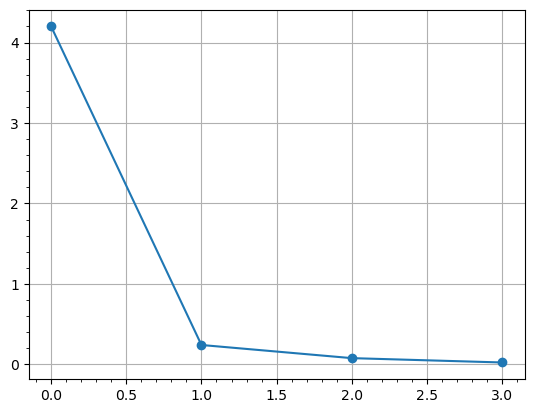

In [14]:
plt.plot([L1,L2,L3,L4], marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()

In [16]:
U1 = Xc1 @ a1
U2 = Xc1 @ a2
U3 = Xc1 @ a3
U4 = Xc1 @ a4

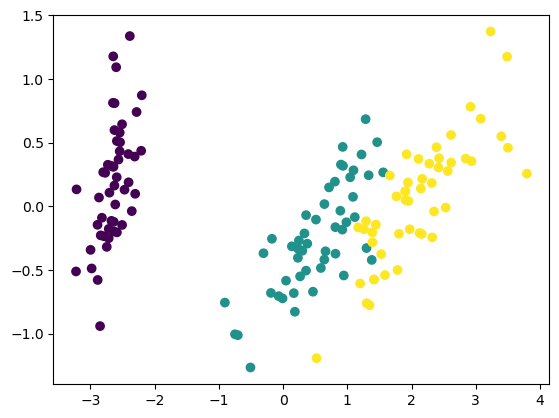

In [17]:
plt.scatter(U1, U2, c=Y)
plt.show()

In [19]:
V1 = U1 @ U1
V2 = U2 @ U2
V3 = U3 @ U3
V4 = U4 @ U4
V = V1+V2+V3+V4
V1 /= V
V2 /= V
V3 /= V
V4 /= V


[0.925 0.053 0.017 0.005]


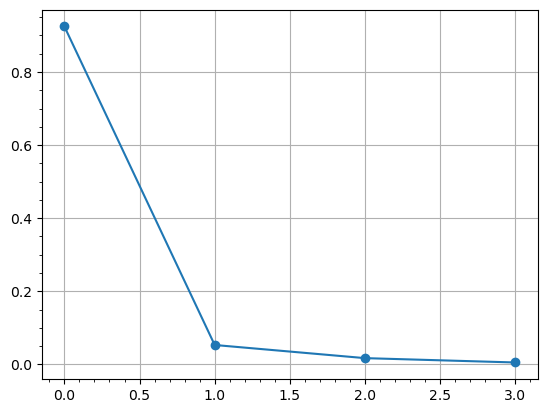

In [20]:
VV = np.array([V1,V2,V3,V4])
print(VV)
plt.plot(VV, marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()

In [19]:
# As = []
# Ls = []
# Us = []
# Xc = Xc0 = X - c
# for i in range(4):
#     a, L = pca.find_pc(Xc)
#     Xc = pca.project(Xc, a)
#     U = Xc0 @ a
#     As.append(a)
#     Ls.append(L)
#     Us.append(U)
    
# As = np.array(As)
# Ls = np.array(Ls)
# Us = np.array(Us)

In [21]:
c, As, Ls = pca.find_loc_and_pc(X)
Us = pca.transform(X, c, As)
print(Us.shape)

(150, 4)


In [22]:
print(Ls/Ls.sum())

[0.925 0.053 0.017 0.005]


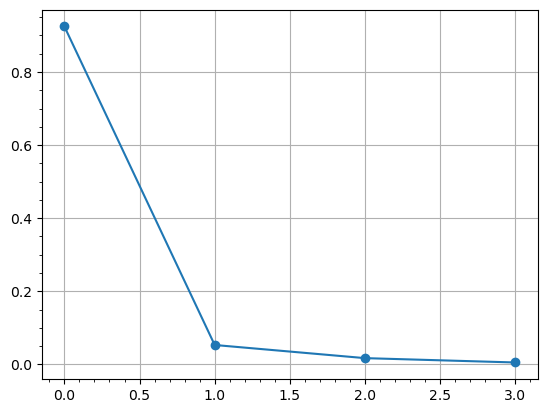

In [23]:
plt.plot(Ls/Ls.sum(), marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()